In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data = pd.read_csv("../data/scaled_without_bin.csv")
ds2=data.copy()


In [75]:
print(ds2.tail())

          id  gender  cholesterol  gluc  diabetic  smoke  alco  active  \
55787  53324       1            3     3         3      0     0       0   
55788   8962       1            1     1         1      0     0       1   
55789  78588       2            3     3         3      0     0       1   
55790   1201       2            1     1         1      0     0       0   
55791  22642       1            2     1         1      0     0       1   

       cardio  height_m  ...  diabetic_1  diabetic_2  diabetic_3       age  \
55787       1      1.75  ...         0.0         0.0         1.0  0.600000   
55788       0      1.58  ...         1.0         0.0         0.0  0.457143   
55789       1      1.88  ...         0.0         0.0         1.0  0.942857   
55790       0      1.71  ...         1.0         0.0         0.0  0.400000   
55791       1      1.58  ...         1.0         0.0         0.0  0.742857   

         height    weight   bp_high     bp_lo       bmi  cardio.1  
55787  0.724138  0

In [76]:
print(ds2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             55792 non-null  int64  
 1   gender         55792 non-null  int64  
 2   cholesterol    55792 non-null  int64  
 3   gluc           55792 non-null  int64  
 4   diabetic       55792 non-null  int64  
 5   smoke          55792 non-null  int64  
 6   alco           55792 non-null  int64  
 7   active         55792 non-null  int64  
 8   cardio         55792 non-null  int64  
 9   height_m       55792 non-null  float64
 10  cholesterol_1  55792 non-null  float64
 11  cholesterol_2  55792 non-null  float64
 12  cholesterol_3  55792 non-null  float64
 13  gluc_1         55792 non-null  float64
 14  gluc_2         55792 non-null  float64
 15  gluc_3         55792 non-null  float64
 16  diabetic_1     55792 non-null  float64
 17  diabetic_2     55792 non-null  float64
 18  diabet

In [77]:
print(ds2.isnull().sum())

id               0
gender           0
cholesterol      0
gluc             0
diabetic         0
smoke            0
alco             0
active           0
cardio           0
height_m         0
cholesterol_1    0
cholesterol_2    0
cholesterol_3    0
gluc_1           0
gluc_2           0
gluc_3           0
diabetic_1       0
diabetic_2       0
diabetic_3       0
age              0
height           0
weight           0
bp_high          0
bp_lo            0
bmi              0
cardio.1         0
dtype: int64


In [78]:
ds2 = ds2.drop(columns=["id","cardio"], axis=1)

In [79]:
correlation_matrix =ds2.corr(method='spearman').round(2)
correlation_matrix

,gender,cholesterol,gluc,diabetic,smoke,alco,active,height_m,cholesterol_1,cholesterol_2,...,diabetic_1,diabetic_2,diabetic_3,age,height,weight,bp_high,bp_lo,bmi,cardio.1
gender,1.00,-0.03,-0.02,-0.02,0.34,0.17,0.00,0.53,0.03,-0.02,...,0.02,-0.00,-0.02,-0.02,0.53,0.17,0.06,0.06,-0.09,0.01
cholesterol,-0.03,1.00,0.40,0.66,0.02,0.05,0.01,-0.06,-0.99,0.57,...,-0.64,0.13,0.66,0.14,-0.06,0.14,0.21,0.16,0.18,0.21
gluc,-0.02,0.40,1.00,0.79,-0.00,0.02,-0.01,-0.03,-0.39,0.14,...,-0.81,0.58,0.53,0.09,-0.03,0.11,0.10,0.08,0.13,0.09
diabetic,-0.02,0.66,0.79,1.00,0.01,0.03,0.01,-0.04,-0.60,0.05,...,-0.99,0.42,0.85,0.15,-0.04,0.15,0.18,0.14,0.18,0.18
smoke,0.34,0.02,-0.00,0.01,1.00,0.34,0.02,0.20,-0.02,0.03,...,-0.01,0.01,0.00,-0.05,0.20,0.07,0.03,0.03,-0.03,-0.01
alco,0.17,0.05,0.02,0.03,0.34,1.00,0.03,0.10,-0.05,0.04,...,-0.03,0.03,0.02,-0.03,0.10,0.07,0.03,0.04,0.03,-0.01
active,0.00,0.01,-0.01,0.01,0.02,0.03,1.00,-0.01,-0.00,-0.01,...,-0.01,-0.01,0.02,-0.01,-0.01,-0.01,-0.01,-0.00,-0.01,-0.04
height_m,0.53,-0.06,-0.03,-0.04,0.20,0.10,-0.01,1.00,0.06,-0.03,...,0.04,-0.01,-0.04,-0.08,1.00,0.31,0.02,0.03,-0.18,-0.01
cholesterol_1,0.03,-0.99,-0.39,-0.60,-0.02,-0.05,-0.00,0.06,1.00,-0.68,...,0.59,-0.17,-0.56,-0.13,0.06,-0.14,-0.20,-0.16,-0.17,-0.20
cholesterol_2,-0.02,0.57,0.14,0.05,0.03,0.04,-0.01,-0.03,-0.68,1.00,...,-0.08,0.30,-0.12,0.02,-0.03,0.07,0.10,0.07,0.09,0.08


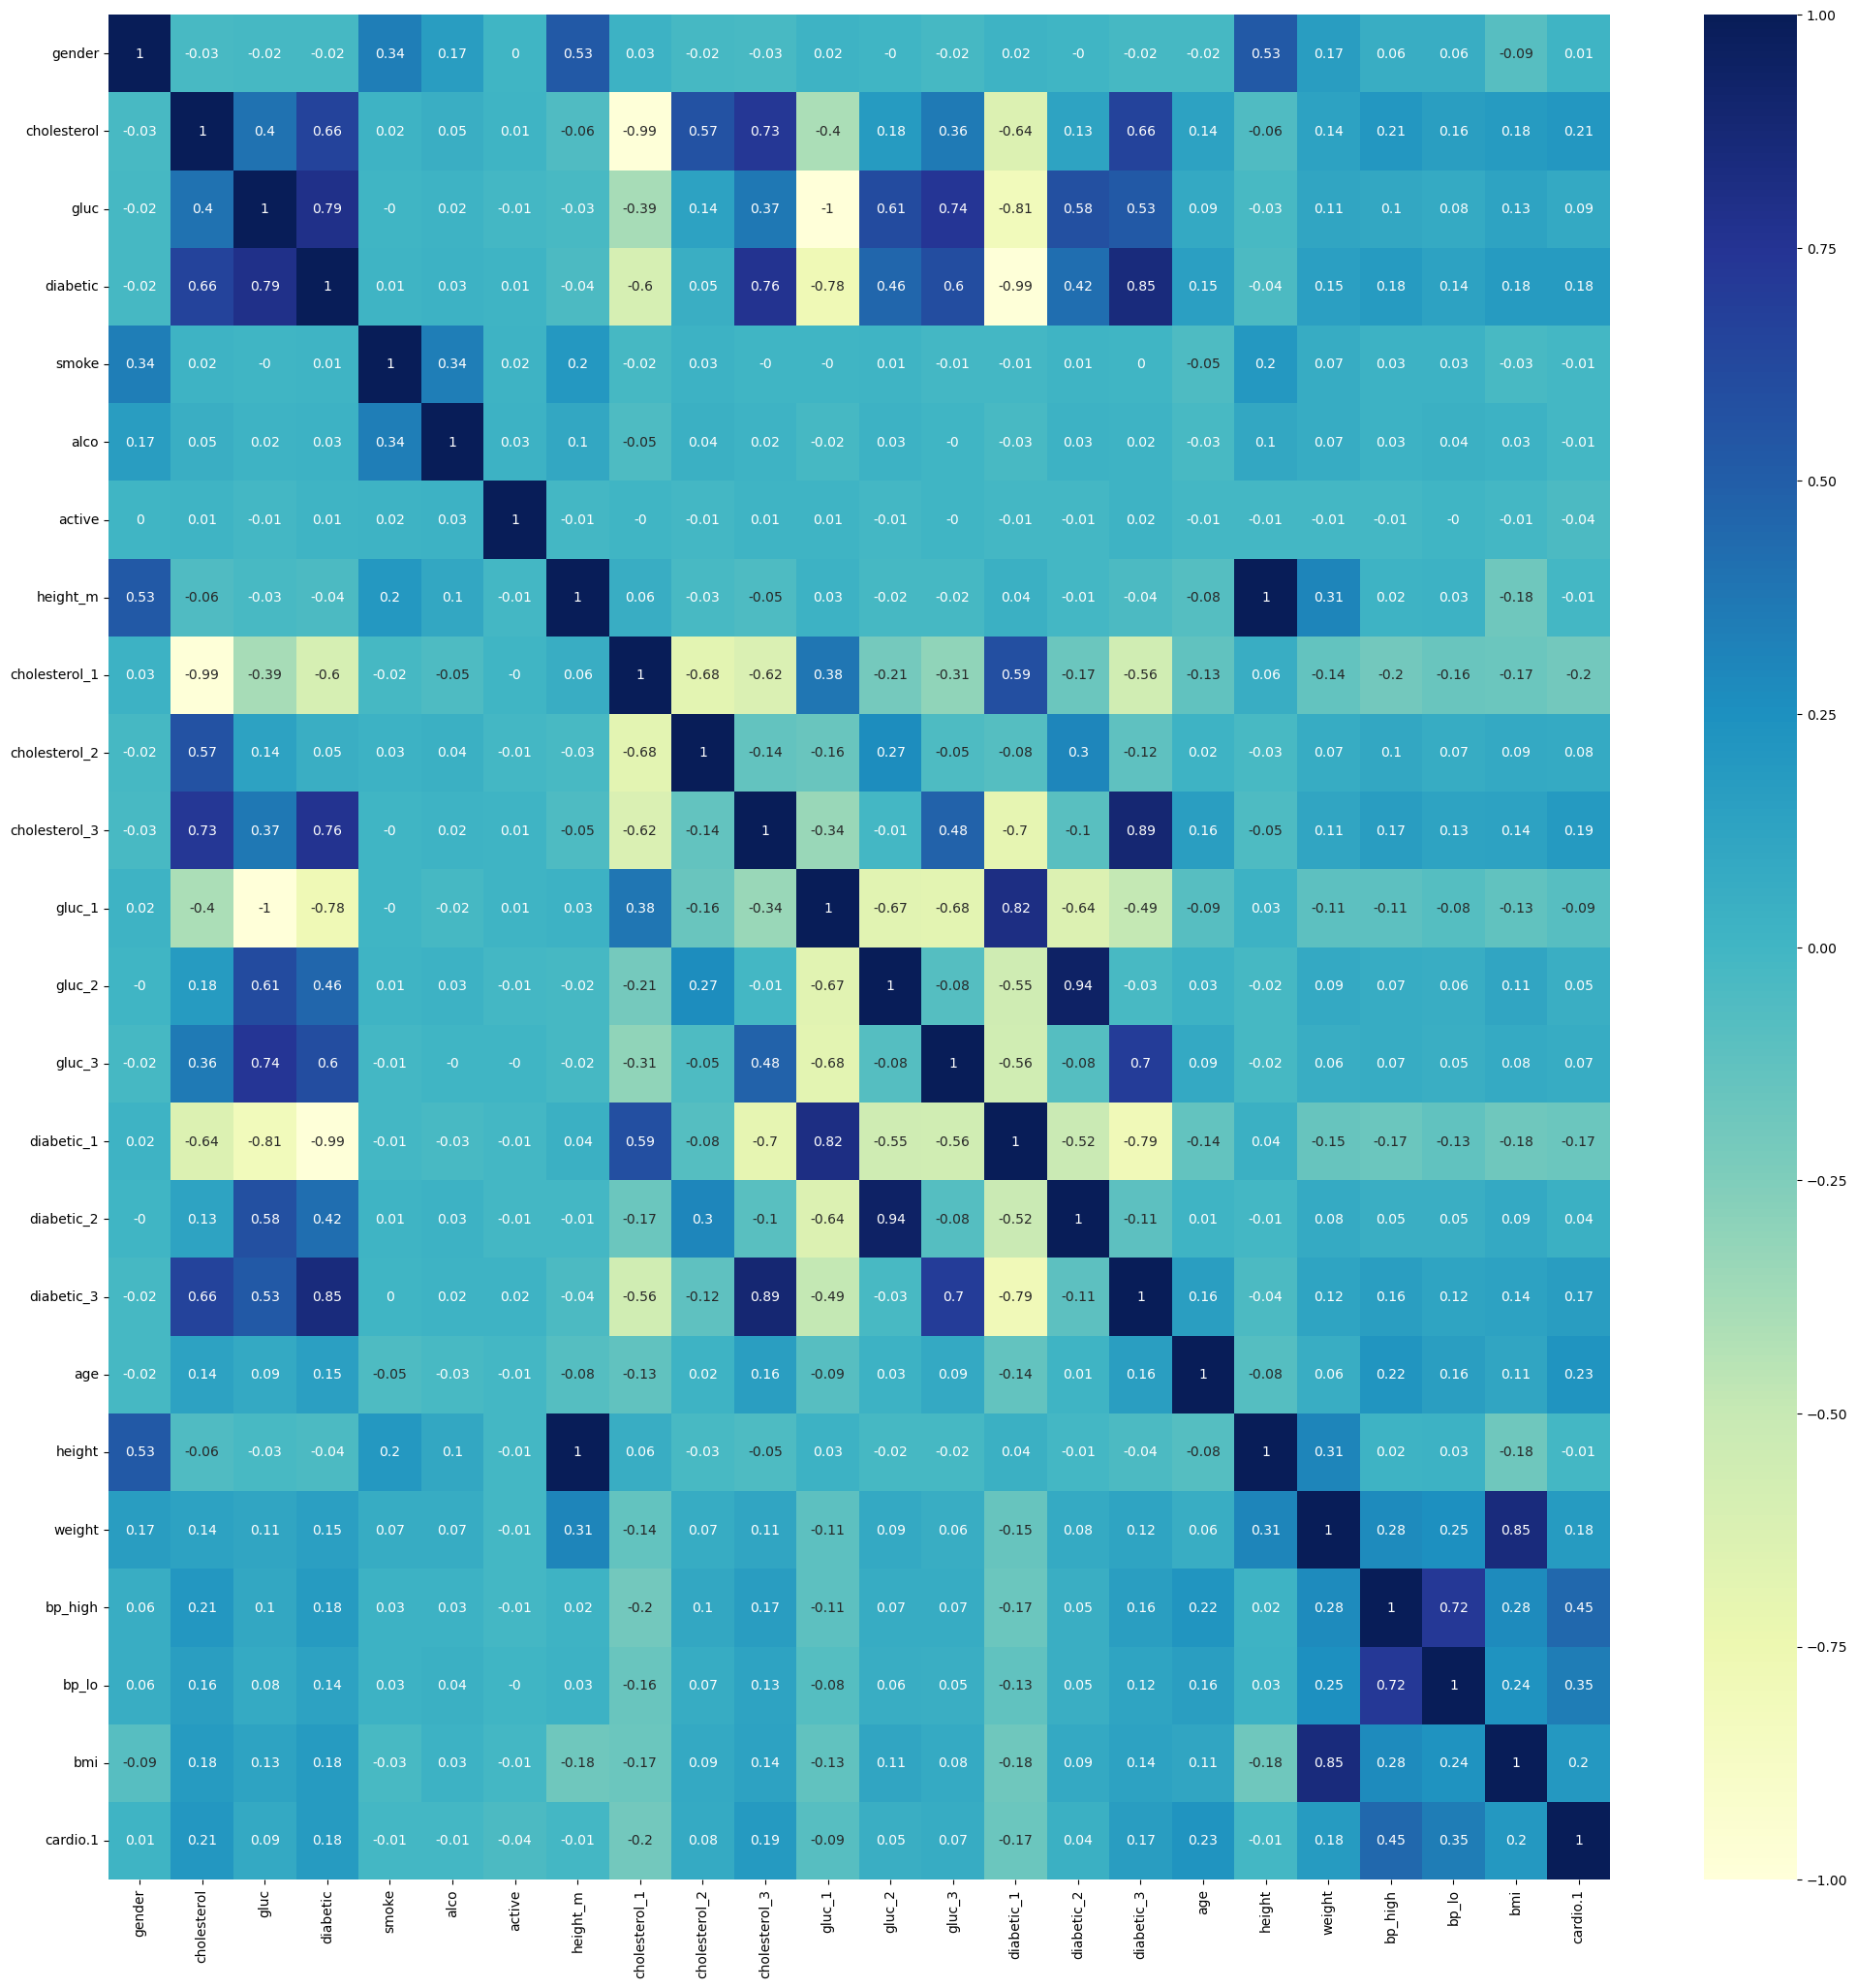

In [80]:
fig, ax = plt.subplots(figsize=(25,25))
dataplot = sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True) 
plt.show() 

In [81]:
threshold=0.15
relative_correl=correlation_matrix['cardio.1']
raw_cols=relative_correl[abs(relative_correl)>threshold].index.tolist()
raw_features=ds2[raw_cols]
raw_features.head()


,cholesterol,diabetic,cholesterol_1,cholesterol_3,diabetic_1,diabetic_3,age,weight,bp_high,bp_lo,bmi,cardio.1
0,2,1,0.0,0.0,1.0,0.0,0.885714,0.205882,0.235294,0.442857,0.102941,1
1,1,1,1.0,0.0,1.0,0.0,1.000000,0.258824,0.529412,0.714286,0.154412,1
2,1,1,1.0,0.0,1.0,0.0,0.571429,0.176471,0.352941,0.428571,0.073529,1
3,1,1,1.0,0.0,1.0,0.0,0.571429,0.382353,0.294118,0.571429,0.147059,1
4,1,1,1.0,0.0,1.0,0.0,0.685714,0.170588,0.235294,0.285714,0.080882,0


<Axes: >

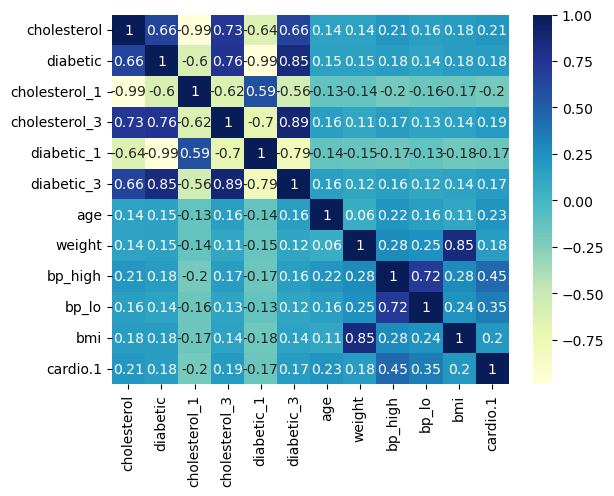

In [82]:
new_correl=raw_features.corr(method='spearman').round(2)
sns.heatmap(new_correl, cmap="YlGnBu", annot=True)

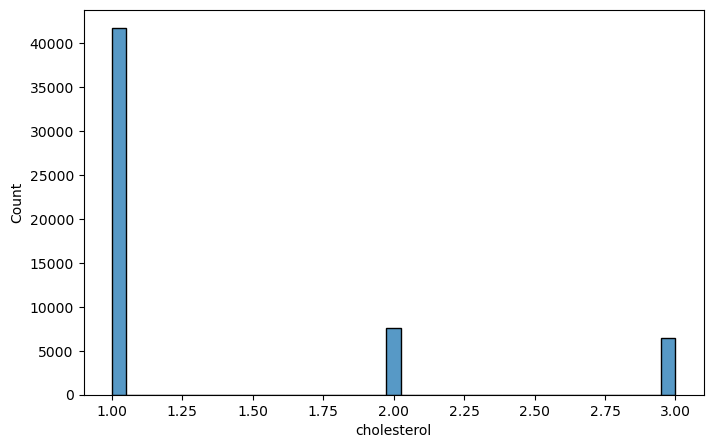

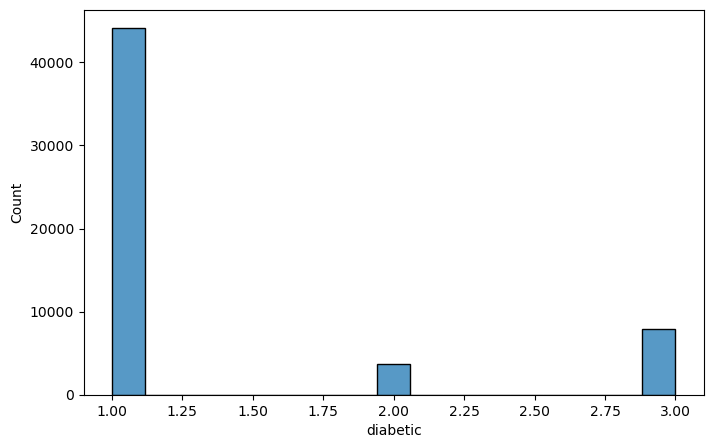

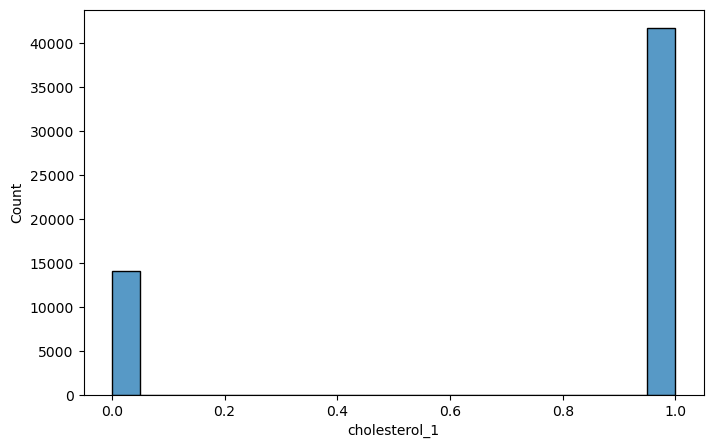

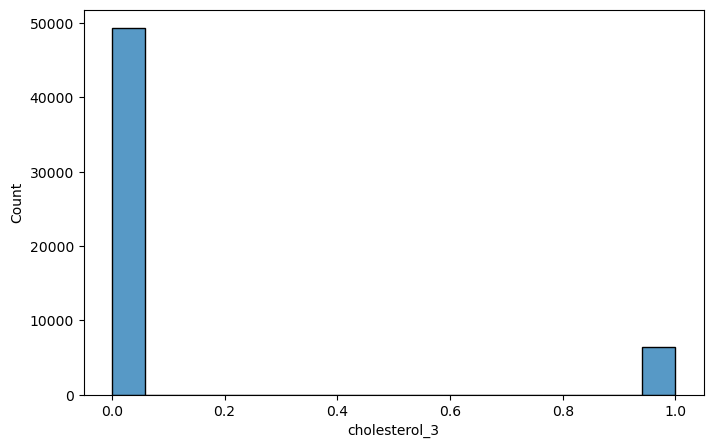

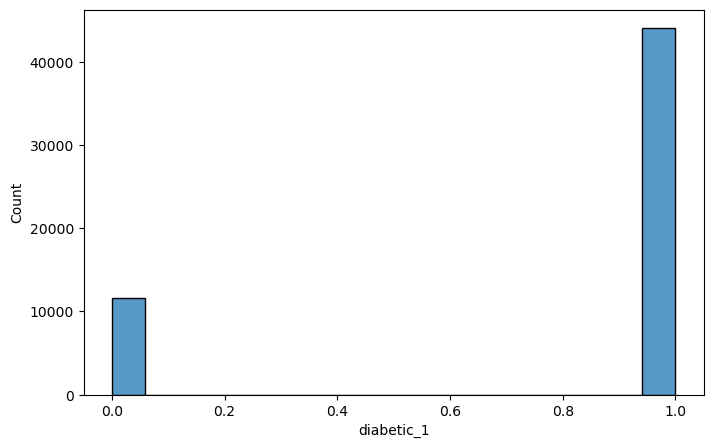

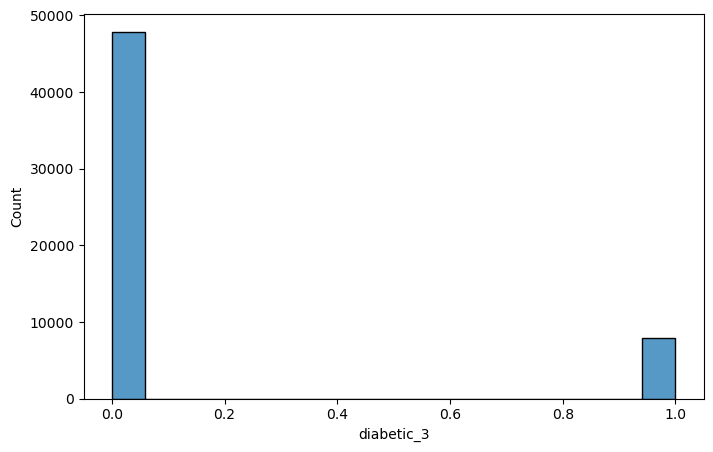

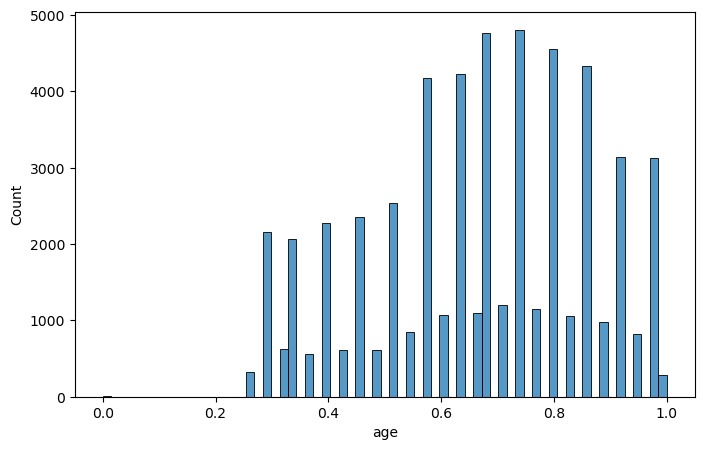

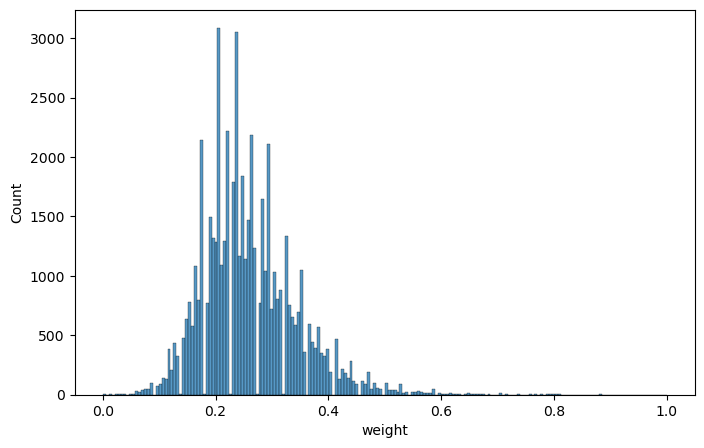

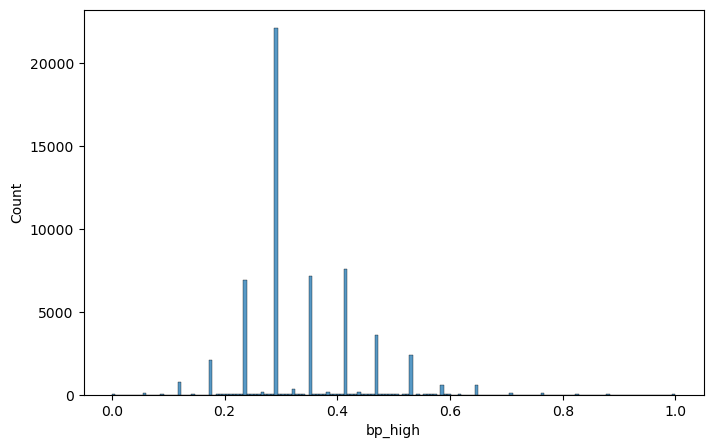

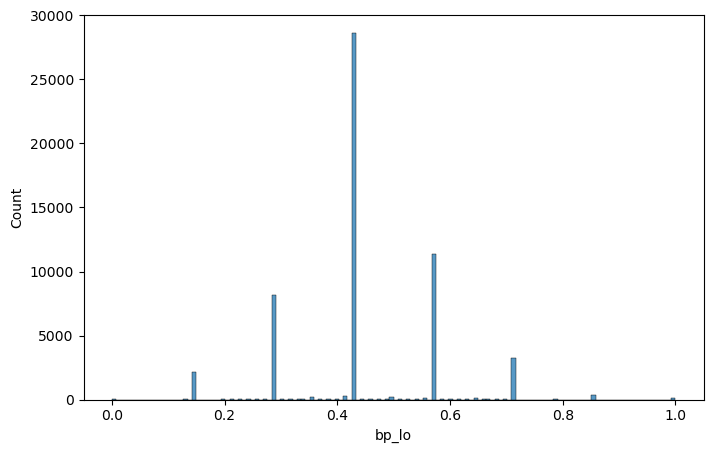

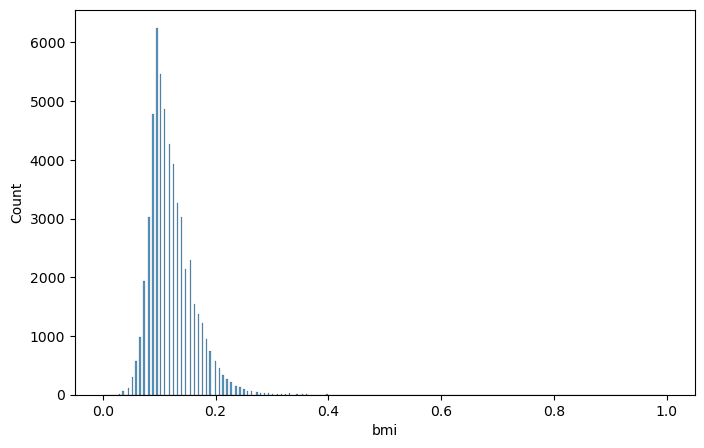

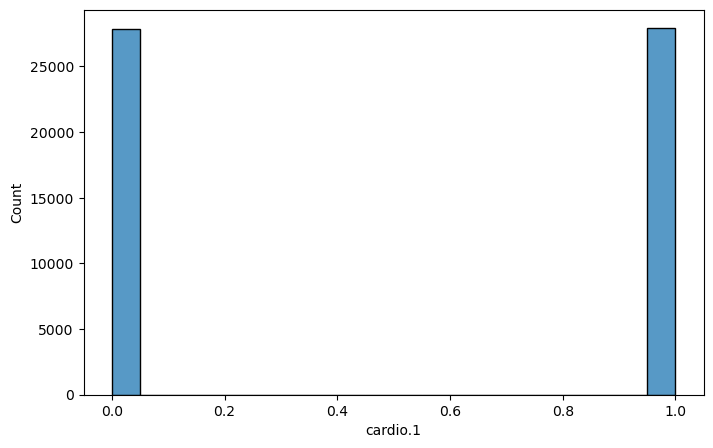

In [83]:

for col in raw_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(ds2[col])